In [1]:
from yolo import YOLO
from utils import get_annotations_images, LabelEncoder, read_labels
from config import Config
from networkfactory import NetworkFactory
from tensorflow.keras.optimizers import Adam

In [2]:
annotation_folder = r'.\annotations'
images_folder = r'.\images'

annotations, images = get_annotations_images(annotation_folder, images_folder)
images = images[0:50]

In [3]:
labels_dir = "./labels.txt"
cfg_path = r"./cfg/mobilenetyolov2.cfg"
weights = r"./weights/mobilenetyolov2_take2"

cfg = Config(cfg_path)
encoder = LabelEncoder(read_labels(labels_dir)[0])
networkfactory = NetworkFactory()

yolo = YOLO(cfg, encoder, networkfactory, weights)

C:\Users\Gencho\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
W0314 23:26:34.454125  7852 deprecation.py:506] From C:\Users\Gencho\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0314 23:28:06.592137  7852 deprecation.py:323] From C:\Users\Gencho\Desktop\ObjectDetection\yolo.py:108: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0314 23:28:06.695134  7852 deprecation.py:32

In [6]:
for image in images:
    objs = yolo.feed_forward(image, draw = False, save_image = True, supression="group", onlyconf = False)
    #for obj in objs:
    #    print(obj)

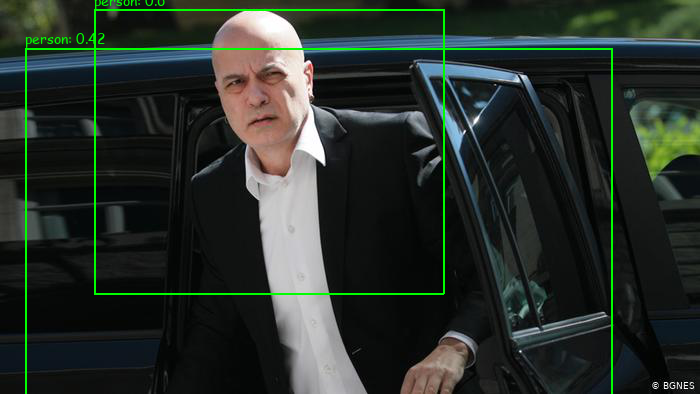

person (0.6026497950038073) (94.73129917721865, 9.535048685988235) (443.73023928402796, 293.5418744381211)
person (0.41804663109600826) (25.305487293162212, 48.82264474931703) (611.6973889702847, 464.5584675909015)


In [9]:
afk = r"./mytestimages/slavi.jpg"

objs = yolo.feed_forward(afk, draw = True, supression="group", save_image = True, save_json = True, onlyconf = False)
for obj in objs:
    print(obj)